## Imports

In [21]:
import pandas as pd
import numpy as np
from itertools import combinations
import seaborn as sn
import matplotlib.pyplot as plt

# Exploratory Data Analysis (EDA)

Before we perform any feature engineering and start training models, we need to explore properties of the data.

In [43]:
data_file = '../tdt05-2021-challenge-2/challenge2_train.csv'
df = pd.read_csv(data_file)
df

,id,target,f0,f1,f2,f3,f4,f5,f6,f7,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
0,0,0,1.0,gL,e,3.0,A,NaN,0.0,6.0,...,0.5,0.0,3.0,R,328b0cf4e,0.834041,T,N,1.0,14.2364
1,1,0,0.0,Rj,c,1.0,A,7.0,1.0,4.0,...,0.4,0.0,1.0,NaN,328b0cf4e,0.686021,T,N,1.0,NaN
2,2,0,NaN,In,a,1.0,A,10.0,1.0,6.0,...,0.5,1.0,3.0,G,0c67fcbbd,1.141271,T,N,3.0,NaN
3,3,1,1.0,rA,c,3.0,A,7.0,1.0,1.0,...,0.6,1.0,1.0,G,fee4e3007,0.662382,T,N,3.0,NaN
4,4,0,1.0,pE,c,3.0,A,7.0,0.0,6.0,...,0.5,0.0,1.0,B,587e040bd,-1.000000,T,N,1.0,13.9537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,1,0.0,tT,d,3.0,NaN,11.0,0.0,1.0,...,0.6,1.0,1.0,R,72ccba7a4,0.890576,T,N,3.0,14.0466
49996,49996,0,1.0,pB,b,2.0,A,7.0,0.0,6.0,...,0.1,0.0,7.0,R,250eea49d,NaN,T,N,1.0,14.0157
49997,49997,0,0.0,TL,e,1.0,A,11.0,0.0,6.0,...,NaN,0.0,7.0,G,110d4786e,1.327592,T,N,1.0,13.9255
49998,49998,0,0.0,Bx,a,1.0,A,7.0,1.0,4.0,...,0.4,0.0,3.0,R,0dcf409af,0.842615,T,S,1.0,14.3062


We see that the training set has 50000 rows, each with an ID, a target value (the class label to be predicted later), and 29 features. Let's explore some properties of each feature. First, we create a dataframe with only features (without ID and target), along with numeric and strictly float dataframes.

In [42]:
# We first remove ID, target, and all columns that are not numeric
df = df.drop(labels=['id'], axis=1)
df_feat = df.drop(labels=['target'], axis=1)
#df_num = df_feat.select_dtypes(include=[np.number])
#df_float = df_num.select_dtypes(exclude=[int])
#df_num
#df_float

In [48]:
df['target'] = df['target'].astype(int)
df

,id,target,f0,f1,f2,f3,f4,f5,f6,f7,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
0,0,0,1.0,gL,e,3.0,A,NaN,0.0,6.0,...,0.5,0.0,3.0,R,328b0cf4e,0.834041,T,N,1.0,14.2364
1,1,0,0.0,Rj,c,1.0,A,7.0,1.0,4.0,...,0.4,0.0,1.0,NaN,328b0cf4e,0.686021,T,N,1.0,NaN
2,2,0,NaN,In,a,1.0,A,10.0,1.0,6.0,...,0.5,1.0,3.0,G,0c67fcbbd,1.141271,T,N,3.0,NaN
3,3,1,1.0,rA,c,3.0,A,7.0,1.0,1.0,...,0.6,1.0,1.0,G,fee4e3007,0.662382,T,N,3.0,NaN
4,4,0,1.0,pE,c,3.0,A,7.0,0.0,6.0,...,0.5,0.0,1.0,B,587e040bd,-1.000000,T,N,1.0,13.9537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,1,0.0,tT,d,3.0,NaN,11.0,0.0,1.0,...,0.6,1.0,1.0,R,72ccba7a4,0.890576,T,N,3.0,14.0466
49996,49996,0,1.0,pB,b,2.0,A,7.0,0.0,6.0,...,0.1,0.0,7.0,R,250eea49d,NaN,T,N,1.0,14.0157
49997,49997,0,0.0,TL,e,1.0,A,11.0,0.0,6.0,...,NaN,0.0,7.0,G,110d4786e,1.327592,T,N,1.0,13.9255
49998,49998,0,0.0,Bx,a,1.0,A,7.0,1.0,4.0,...,0.4,0.0,3.0,R,0dcf409af,0.842615,T,S,1.0,14.3062


## Individual features

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from tqdm import tqdm_notebook

We first calculate how large percentages there are of df_feat_2 values for each column, and plot it in a bar plot.

In [14]:
def plot_missing(df):
    percent_missing = [df[col].isnull().sum()/len(df) for col in df.columns]
    missing_values = pd.DataFrame({'Proportion_of_total_rows': percent_missing}, index=df.columns)
    missing_values.plot.barh()

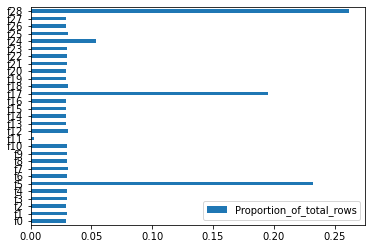

In [15]:
plot_missing(df_feat)

We see that f5, f17 and f28 all have a relatively large percent (17-25%) of missing values. These columns therefore need to have their missing values properly imputed, or the features might have to be removed alltogether.

In [7]:
df_feat_2 = df_feat.drop(labels=['f5','f17','f28'], axis=1)

We also check the test set for missing values:

In [8]:
data_file = '../tdt05-2021-challenge-2/challenge2_test.csv'
test_set = pd.read_csv(data_file)

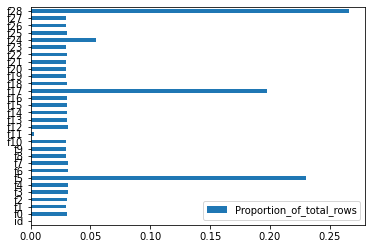

In [16]:
plot_missing(test_set)

The test set has the same proportions of missing values for each feature, so no more features need to be imputed or removed.

In [10]:
#df.describe()

In [11]:
#df_num[df_num.columns[0:5]].hist(grid=False, legend=False)
#df_num[df_num.columns[5:10]].hist(grid=False, legend=False)
#df_num[df_num.columns[10:14]].hist(grid=False, legend=False)

## Target distribution

Now we check the distribution of rows to each target class:

<AxesSubplot:ylabel='Frequency'>

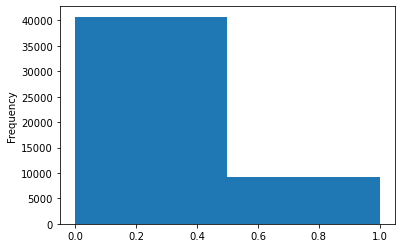

In [44]:
df['target'].plot.hist(bins=2)

In [21]:
df[['target']].value_counts()

target
0         40744
1          9256
dtype: int64

With almost 41K rows labeled '0' and a little over 9K rows labeled '1', the dataset is quite imbalanced (around a 4:1 ratio of rows between the classes). This means that the dataset must either be resampled, or we must account for the imbalance in model selection and training.

## Feature relations

We now plot a heat map, that is a matrix of correlation values for each combination of scalar features: 

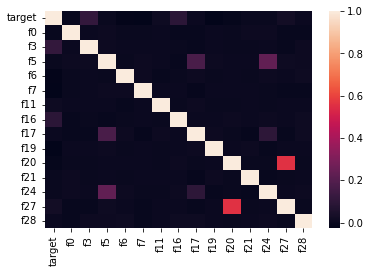

In [22]:
corr = df.corr()
sn.heatmap(corr)
plt.show()

We see that most features are hardly correlating at a all with other features, except for some combinations. We will take a closer look at the feature pairs f5-f24, f20-f27, as well as target-f3 and target-f5:

<AxesSubplot:xlabel='f5', ylabel='f24'>

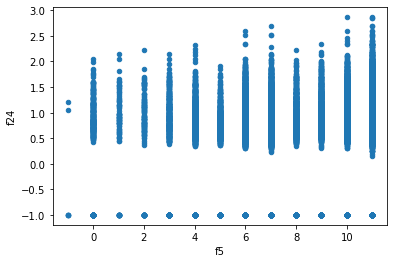

In [50]:
df.plot.scatter(x='f5',y='f24')

<AxesSubplot:xlabel='f20', ylabel='f27'>

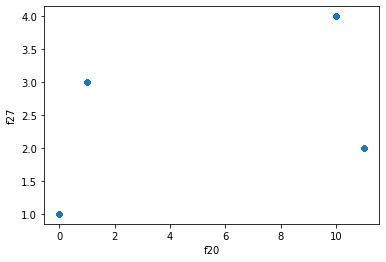

In [51]:
df.plot.scatter(x='f20',y='f27')

<AxesSubplot:xlabel='target', ylabel='f3'>

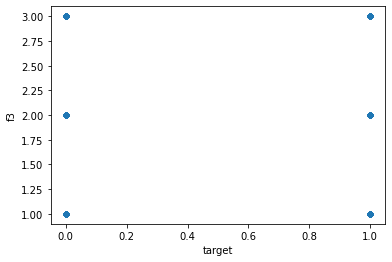

In [52]:
corr[]

We see that there is not any particularly signifcant correlation between f5 and f24. There is some evident correlation between f20 and f27, but since both values are most likely categorical (they have only four possible values each) and the correlation is rather weak, it is unlikely that there is actually a useful pattern here.

In [ ]:
data_file = './engineered_data.csv'
ed = pd.read_csv(data_file)
ed

In [ ]:
datadf = df.drop(['id'], axis=1)
cols = datadf.columns.tolist()

#datadf.fillna('missing', inplace=True)

datadf_f1_f2 = datadf[['f3', 'f2']]
cols_f1_f2 = datadf_f1_f2.columns.tolist()
i = 0
old_prem_col = None

for col1, col2 in combinations(cols_f1_f2, 2):
    if old_prem_col != col1:
        old_prem_col = col1
        print(f'\n\n|---------------{col1}------------------|\n\n')
    if len(datadf_f1_f2[col1].unique()) >= len(datadf_f1_f2[col2].unique()):
        ind = col1
        ccc = col2
    else:
        ind = col2
        ccc = col1
    cooc_df = pd.crosstab(datadf_f1_f2[ind], datadf_f1_f2[ccc], normalize="index", dropna=False)
    if col1 == 'target':
        cooc_df.sort_values(by=0, ascending=False, inplace=True)
    else:
        cooc_df.dropna() #'missing', axis=1, inplace=True)
    print(cooc_df.to_string())
    print('\n\n|--------------------------------------------|\n\n')

    

In [ ]:
datadf_f1_f2

In [ ]:
datadf_f1_f2.plot.scatter(x='f3', y='f2')

In [ ]:
df['f28'].value_counts(dropna=False)

In [ ]:
nda = df['f26'].dropna().unique()
np.sort(nda)